In [12]:
import numpy as np 
import pandas as pd 

In [13]:
df = pd.read_csv('youtubedata.csv')
df 

,Unnamed: 0.1,Unnamed: 0,title,description,view_count,like_count,favorite_count,comment_count,time_in_seconds,comment
0,0,0,Toy Story (1995),Trailer for Toy Story (1995) captured from the...,112928,125,0,0,91.0,NaN
1,1,1,Grumpier Old Men (1995),"The more things change, the more they stay the...",212610,218,0,13,112.0,Buena película de comedia romántica
2,2,2,Heat (1995),"Director: Michael Mann.\nCast: Al Pacino, Robe...",1390267,7539,0,638,148.0,Pacino and De Niro make this movie together
3,3,3,GoldenEye (1995),"Release Date: November 13, 1995\n\nPierce Bros...",378404,2175,0,200,172.0,Cool IT men
4,4,4,"American President, The (1995)",Subscribe to MovieTrailersByVD: http://bit.ly/...,16305,25,0,2,170.0,Why does this have the Little Women (1994) sco...
...,...,...,...,...,...,...,...,...,...,...
17807,17807,3708,Memoirs of an Invisible Man (1992),"Like most Chevy Chase movies from the '90s, Me...",75124,130,0,17,116.0,"And finally, I get to see the full trailer of ..."
17808,17808,3709,God told Me To (1976),"""Shot guerilla-style all over New York City by...",5562,109,0,5,90.0,The perfect film for Easter ! 😉
17809,17809,3710,"Brood, The (1979)",Trailer of the film The Brood without any defe...,55317,87,0,18,63.0,0:39 Am I the only one totally impressed by th...
17810,17810,3711,Underworld (2003),Director: Len Wiseman\r\nCast: Kate Beckinsale...,349495,285,0,15,148.0,What’s the song in the trailer


##### Data Cleansing

In [14]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,view_count,like_count,favorite_count,comment_count,time_in_seconds
count,17812.000000,17812.000000,1.781200e+04,17812.000000,17812.0,17812.000000,17812.000000
mean,8905.500000,1793.433191,3.998137e+05,1110.173422,0.0,109.171907,146.736077
std,5142.025833,1048.323794,2.154927e+06,3884.688088,0.0,300.974380,127.260357
min,0.000000,0.000000,2.410000e+02,0.000000,0.0,0.000000,61.000000
25%,4452.750000,890.000000,3.304975e+04,97.000000,0.0,9.000000,103.000000
50%,8905.500000,1781.000000,1.026520e+05,261.000000,0.0,30.000000,129.000000
75%,13358.250000,2671.000000,3.358660e+05,798.000000,0.0,93.000000,154.000000
max,17811.000000,3712.000000,1.254557e+08,97644.000000,0.0,7430.000000,3037.000000


##### Missing Value handling

In [15]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
title                0
description        437
view_count           0
like_count           0
favorite_count       0
comment_count        0
time_in_seconds      0
comment            681
dtype: int64

In [16]:
df.fillna('N/A', inplace=True)

In [17]:
df.isnull().sum()

Unnamed: 0.1       0
Unnamed: 0         0
title              0
description        0
view_count         0
like_count         0
favorite_count     0
comment_count      0
time_in_seconds    0
comment            0
dtype: int64

In [18]:
# Removing first two unwanted columns
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)
df.head()

,title,description,view_count,like_count,favorite_count,comment_count,time_in_seconds,comment
0,Toy Story (1995),Trailer for Toy Story (1995) captured from the...,112928,125,0,0,91.0,N/A
1,Grumpier Old Men (1995),"The more things change, the more they stay the...",212610,218,0,13,112.0,Buena película de comedia romántica
2,Heat (1995),"Director: Michael Mann.\nCast: Al Pacino, Robe...",1390267,7539,0,638,148.0,Pacino and De Niro make this movie together
3,GoldenEye (1995),"Release Date: November 13, 1995\n\nPierce Bros...",378404,2175,0,200,172.0,Cool IT men
4,"American President, The (1995)",Subscribe to MovieTrailersByVD: http://bit.ly/...,16305,25,0,2,170.0,Why does this have the Little Women (1994) sco...


In [19]:
df

,title,description,view_count,like_count,favorite_count,comment_count,time_in_seconds,comment
0,Toy Story (1995),Trailer for Toy Story (1995) captured from the...,112928,125,0,0,91.0,N/A
1,Grumpier Old Men (1995),"The more things change, the more they stay the...",212610,218,0,13,112.0,Buena película de comedia romántica
2,Heat (1995),"Director: Michael Mann.\nCast: Al Pacino, Robe...",1390267,7539,0,638,148.0,Pacino and De Niro make this movie together
3,GoldenEye (1995),"Release Date: November 13, 1995\n\nPierce Bros...",378404,2175,0,200,172.0,Cool IT men
4,"American President, The (1995)",Subscribe to MovieTrailersByVD: http://bit.ly/...,16305,25,0,2,170.0,Why does this have the Little Women (1994) sco...
...,...,...,...,...,...,...,...,...
17807,Memoirs of an Invisible Man (1992),"Like most Chevy Chase movies from the '90s, Me...",75124,130,0,17,116.0,"And finally, I get to see the full trailer of ..."
17808,God told Me To (1976),"""Shot guerilla-style all over New York City by...",5562,109,0,5,90.0,The perfect film for Easter ! 😉
17809,"Brood, The (1979)",Trailer of the film The Brood without any defe...,55317,87,0,18,63.0,0:39 Am I the only one totally impressed by th...
17810,Underworld (2003),Director: Len Wiseman\r\nCast: Kate Beckinsale...,349495,285,0,15,148.0,What’s the song in the trailer


##### Handling duplicate data

In [22]:
df[df.duplicated()]

,title,description,view_count,like_count,favorite_count,comment_count,time_in_seconds,comment
2960,Toy Story (1995),Trailer for Toy Story (1995) captured from the...,112928,125,0,0,91.0,N/A
2961,Grumpier Old Men (1995),"The more things change, the more they stay the...",212610,218,0,13,112.0,Buena película de comedia romántica
2962,Heat (1995),"Director: Michael Mann.\nCast: Al Pacino, Robe...",1390267,7539,0,638,148.0,Pacino and De Niro make this movie together
2963,GoldenEye (1995),"Release Date: November 13, 1995\n\nPierce Bros...",378404,2175,0,200,172.0,Cool IT men
2964,"American President, The (1995)",Subscribe to MovieTrailersByVD: http://bit.ly/...,16305,25,0,2,170.0,Why does this have the Little Women (1994) sco...
...,...,...,...,...,...,...,...,...
17807,Memoirs of an Invisible Man (1992),"Like most Chevy Chase movies from the '90s, Me...",75124,130,0,17,116.0,"And finally, I get to see the full trailer of ..."
17808,God told Me To (1976),"""Shot guerilla-style all over New York City by...",5562,109,0,5,90.0,The perfect film for Easter ! 😉
17809,"Brood, The (1979)",Trailer of the film The Brood without any defe...,55317,87,0,18,63.0,0:39 Am I the only one totally impressed by th...
17810,Underworld (2003),Director: Len Wiseman\r\nCast: Kate Beckinsale...,349495,285,0,15,148.0,What’s the song in the trailer


In [24]:
df.duplicated().sum()

14099

In [25]:
df.drop_duplicates(inplace=True)
df

,title,description,view_count,like_count,favorite_count,comment_count,time_in_seconds,comment
0,Toy Story (1995),Trailer for Toy Story (1995) captured from the...,112928,125,0,0,91.0,N/A
1,Grumpier Old Men (1995),"The more things change, the more they stay the...",212610,218,0,13,112.0,Buena película de comedia romántica
2,Heat (1995),"Director: Michael Mann.\nCast: Al Pacino, Robe...",1390267,7539,0,638,148.0,Pacino and De Niro make this movie together
3,GoldenEye (1995),"Release Date: November 13, 1995\n\nPierce Bros...",378404,2175,0,200,172.0,Cool IT men
4,"American President, The (1995)",Subscribe to MovieTrailersByVD: http://bit.ly/...,16305,25,0,2,170.0,Why does this have the Little Women (1994) sco...
...,...,...,...,...,...,...,...,...
6668,Memoirs of an Invisible Man (1992),"Like most Chevy Chase movies from the '90s, Me...",75124,130,0,17,116.0,"And finally, I get to see the full trailer of ..."
6669,God told Me To (1976),"""Shot guerilla-style all over New York City by...",5562,109,0,5,90.0,The perfect film for Easter ! 😉
6670,"Brood, The (1979)",Trailer of the film The Brood without any defe...,55317,87,0,18,63.0,0:39 Am I the only one totally impressed by th...
6671,Underworld (2003),Director: Len Wiseman\r\nCast: Kate Beckinsale...,349495,285,0,15,148.0,What’s the song in the trailer


In [29]:
df.reset_index(inplace=True)

In [31]:
df

,index,title,description,view_count,like_count,favorite_count,comment_count,time_in_seconds,comment
0,0,Toy Story (1995),Trailer for Toy Story (1995) captured from the...,112928,125,0,0,91.0,N/A
1,1,Grumpier Old Men (1995),"The more things change, the more they stay the...",212610,218,0,13,112.0,Buena película de comedia romántica
2,2,Heat (1995),"Director: Michael Mann.\nCast: Al Pacino, Robe...",1390267,7539,0,638,148.0,Pacino and De Niro make this movie together
3,3,GoldenEye (1995),"Release Date: November 13, 1995\n\nPierce Bros...",378404,2175,0,200,172.0,Cool IT men
4,4,"American President, The (1995)",Subscribe to MovieTrailersByVD: http://bit.ly/...,16305,25,0,2,170.0,Why does this have the Little Women (1994) sco...
...,...,...,...,...,...,...,...,...,...
3708,6668,Memoirs of an Invisible Man (1992),"Like most Chevy Chase movies from the '90s, Me...",75124,130,0,17,116.0,"And finally, I get to see the full trailer of ..."
3709,6669,God told Me To (1976),"""Shot guerilla-style all over New York City by...",5562,109,0,5,90.0,The perfect film for Easter ! 😉
3710,6670,"Brood, The (1979)",Trailer of the film The Brood without any defe...,55317,87,0,18,63.0,0:39 Am I the only one totally impressed by th...
3711,6671,Underworld (2003),Director: Len Wiseman\r\nCast: Kate Beckinsale...,349495,285,0,15,148.0,What’s the song in the trailer


In [32]:
# deleting the previous index column
df.drop(columns=['index'], inplace=True)
df

,title,description,view_count,like_count,favorite_count,comment_count,time_in_seconds,comment
0,Toy Story (1995),Trailer for Toy Story (1995) captured from the...,112928,125,0,0,91.0,N/A
1,Grumpier Old Men (1995),"The more things change, the more they stay the...",212610,218,0,13,112.0,Buena película de comedia romántica
2,Heat (1995),"Director: Michael Mann.\nCast: Al Pacino, Robe...",1390267,7539,0,638,148.0,Pacino and De Niro make this movie together
3,GoldenEye (1995),"Release Date: November 13, 1995\n\nPierce Bros...",378404,2175,0,200,172.0,Cool IT men
4,"American President, The (1995)",Subscribe to MovieTrailersByVD: http://bit.ly/...,16305,25,0,2,170.0,Why does this have the Little Women (1994) sco...
...,...,...,...,...,...,...,...,...
3708,Memoirs of an Invisible Man (1992),"Like most Chevy Chase movies from the '90s, Me...",75124,130,0,17,116.0,"And finally, I get to see the full trailer of ..."
3709,God told Me To (1976),"""Shot guerilla-style all over New York City by...",5562,109,0,5,90.0,The perfect film for Easter ! 😉
3710,"Brood, The (1979)",Trailer of the film The Brood without any defe...,55317,87,0,18,63.0,0:39 Am I the only one totally impressed by th...
3711,Underworld (2003),Director: Len Wiseman\r\nCast: Kate Beckinsale...,349495,285,0,15,148.0,What’s the song in the trailer


##### Data Analysis and Visualization

In [10]:
import matplotlib.pyplot as plt

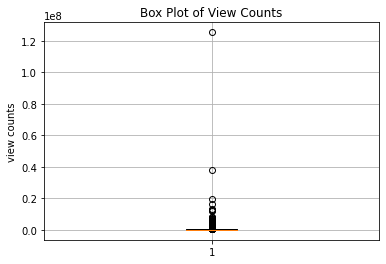

In [34]:
# Create a box plot for view counts
plt.boxplot(df['view_count'])

# Customize the plot (optional)
plt.title('Box Plot of View Counts')
plt.ylabel('view counts')
plt.grid(True)

# Show the plot
plt.show()

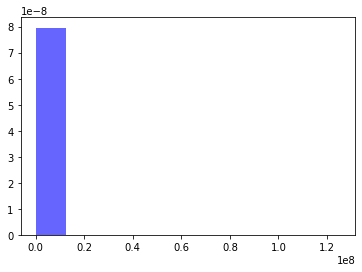

In [39]:
# histogram to visualize the distribution
plt.hist(df['view_count'], bins=10, density=True, alpha=0.6, color='b')
# Show the plot
plt.show()

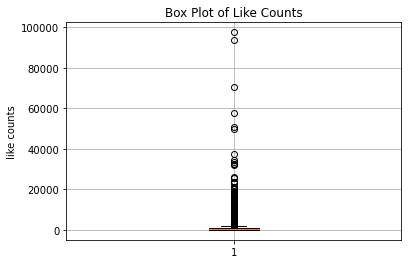

In [35]:
# Create a box plot for like counts
plt.boxplot(df['like_count'])

# Customize the plot (optional)
plt.title('Box Plot of Like Counts')
plt.ylabel('like counts')
plt.grid(True)

# Show the plot
plt.show()

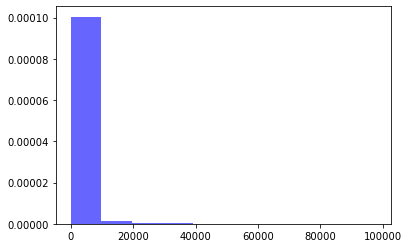

In [38]:
# histogram to visualize the distribution
plt.hist(df['like_count'], bins=10, density=True, alpha=0.6, color='b')
# Show the plot
plt.show()

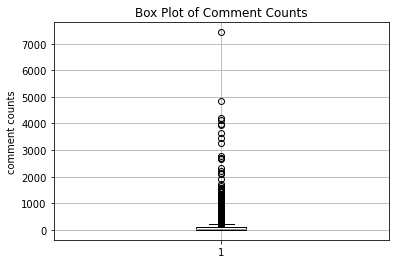

In [40]:
# Create a box plot for comment counts
plt.boxplot(df['comment_count'])

# Customize the plot (optional)
plt.title('Box Plot of Comment Counts')
plt.ylabel('comment counts')
plt.grid(True)

# Show the plot
plt.show()

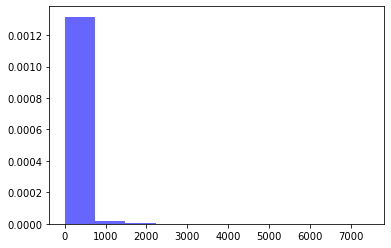

In [41]:
# histogram to visualize the distribution
plt.hist(df['comment_count'], bins=10, density=True, alpha=0.6, color='b')
# Show the plot
plt.show()

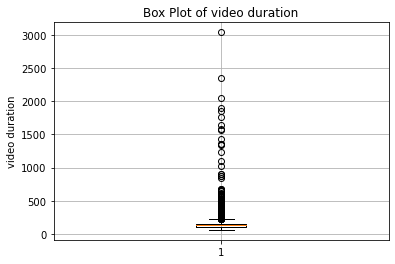

In [42]:
# Create a box plot for duration
plt.boxplot(df['time_in_seconds'])

# Customize the plot (optional)
plt.title('Box Plot of video duration')
plt.ylabel('video duration')
plt.grid(True)

# Show the plot
plt.show()

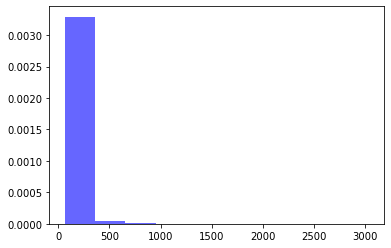

In [43]:
# histogram to visualize the distribution
plt.hist(df['time_in_seconds'], bins=10, density=True, alpha=0.6, color='b')
# Show the plot
plt.show()

In [44]:
import seaborn as sns

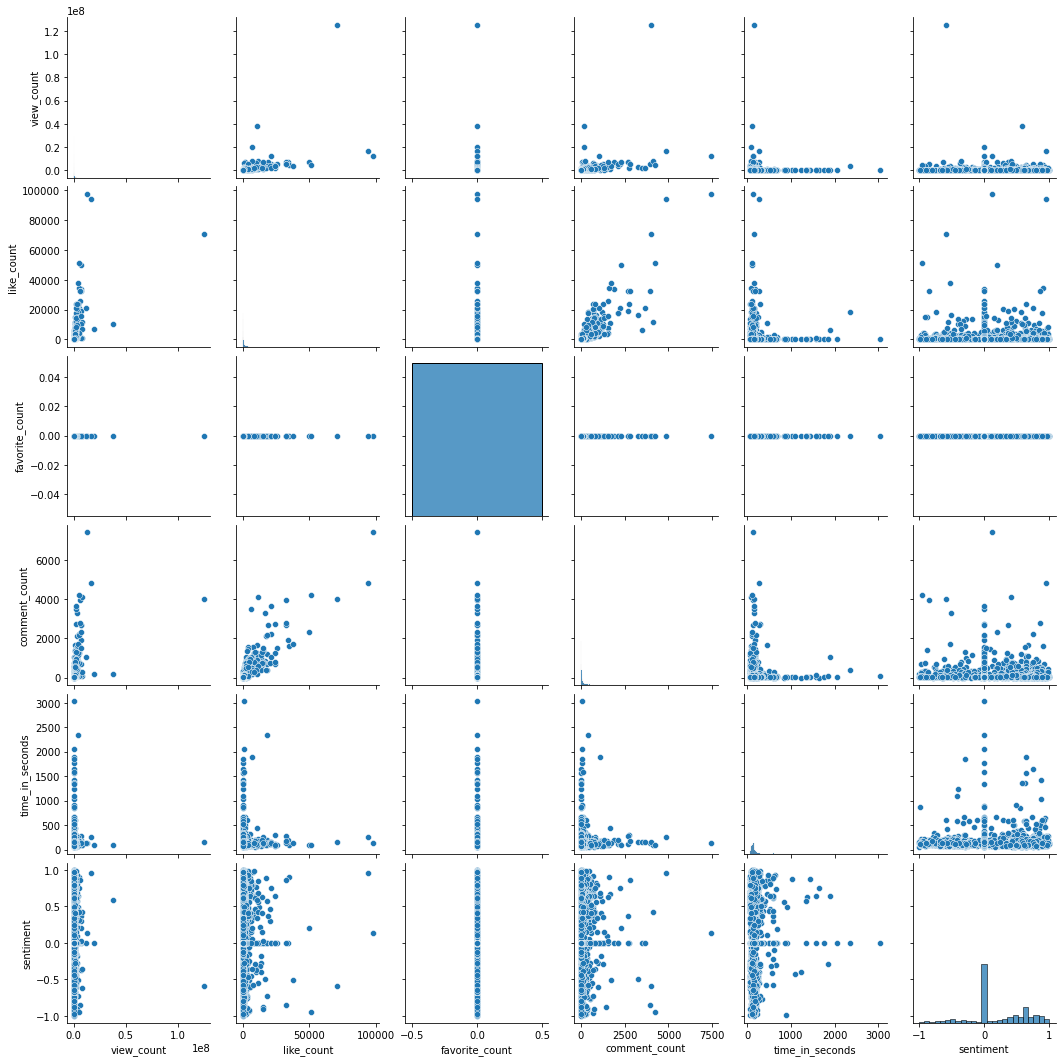

In [94]:
sns.pairplot(df)

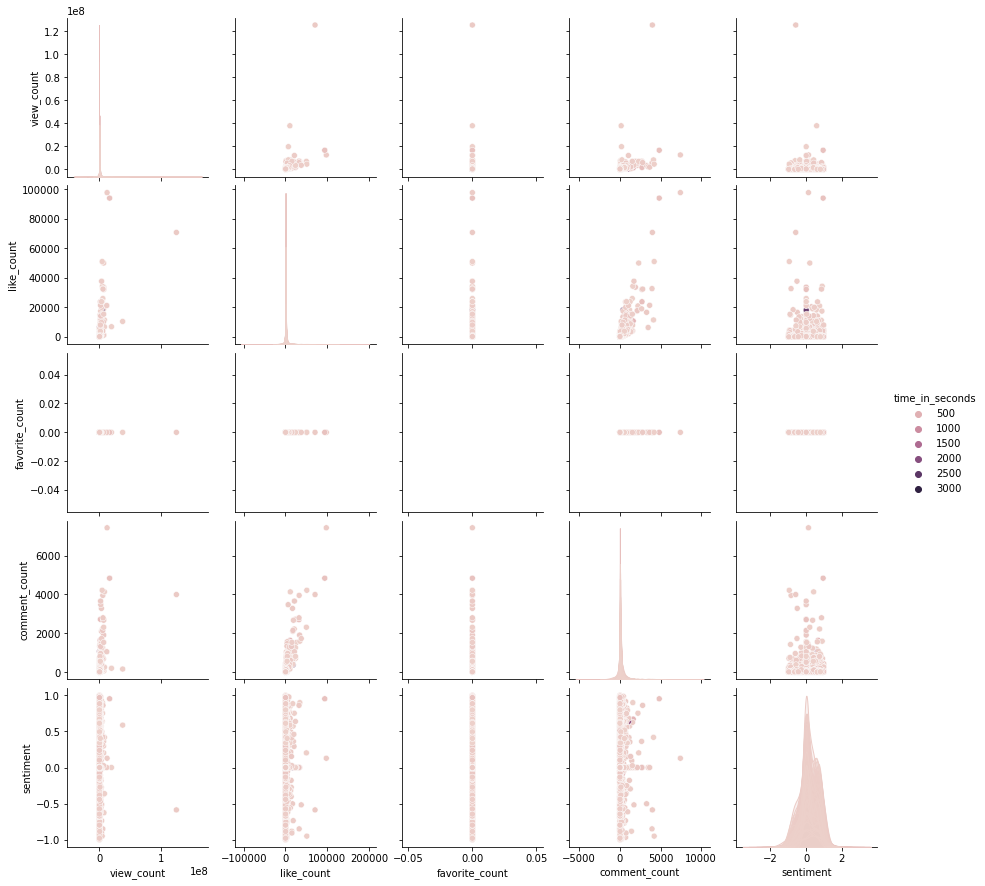

In [93]:
sns.pairplot(df, hue='time_in_seconds')

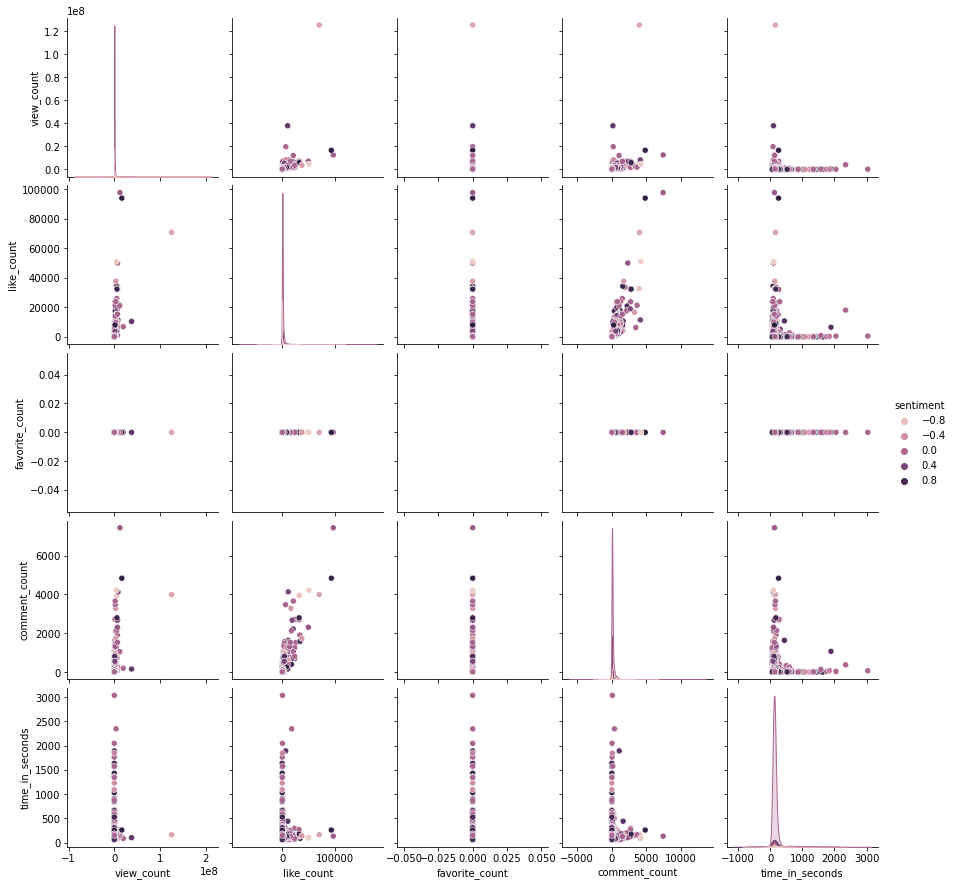

In [95]:
sns.pairplot(df, hue='sentiment')

##### A list of the top-10 videos based on the total views

In [46]:
# Sorting the data on the basis of view counts
df_sorted = df.sort_values(by='view_count', ascending=False)

In [47]:
type(df_sorted)

pandas.core.frame.DataFrame

In [48]:
# Getting and printing the top 10 videos on the basis of view counts
top_10_videos = df_sorted.head(10)

print("Top 10 videos based on the total views: ")
top_10_titles_and_views = top_10_videos[['title', 'view_count']].reset_index(drop=True)
print(top_10_titles_and_views)



Top 10 videos based on the total views: 
                                              title  view_count
0                                 Unfaithful (2002)   125455689
1  Pauline at the Beach (Pauline à la Plage) (1983)    37865868
2                                   High Art (1998)    19685025
3                           Romeo and Juliet (1968)    16586461
4                                  Like Mike (2002)    13322041
5                               Finding Nemo (2003)    12766765
6                                  RoboCop 2 (1990)    12503094
7                                  Secretary (2002)    12019459
8                                        xXx (2002)     8249161
9                        Requiem for a Dream (2000)     8191873


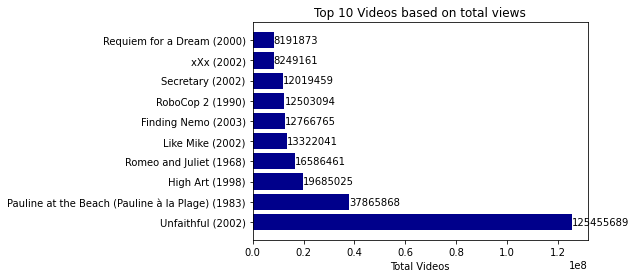

In [61]:
# Visualizing the top 10 videos on the basis of view counts

titles = top_10_titles_and_views['title']
views = top_10_titles_and_views['view_count']

# Create a bar chart
fig, ax = plt.subplots()
bars = ax.barh(titles, views, color='darkblue')

# Add values as labels on the bars
for bar, value in zip(bars, views):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(value), ha='left', va='center')


# Add labels and title
plt.xlabel('Total Videos')

plt.title('Top 10 Videos based on total views')

# Show the plot
plt.show()

##### A list of the bottom-10 videos based on the total views

In [53]:
df_sorted = df.sort_values(by='view_count', ascending=True)

In [54]:
# Getting and printing the bottom 10 videos on the basis of view counts
bottom_10_videos = df_sorted.head(10)

print("Bottom 10 videos based on the total views: ")
bottom_10_titles_and_views = bottom_10_videos[['title', 'view_count']].reset_index(drop=True)
print(bottom_10_titles_and_views)

Bottom 10 videos based on the total views: 
                                          title  view_count
0                         Love Walked In (1998)         241
1  Sacco and Vanzetti (Sacco e Vanzetti) (1971)         459
2                                   Eden (1997)         627
3                       Leopard Son, The (1996)         634
4                             My Kingdom (2001)         709
5                                  Trans (1998)         715
6                                  Rosie (1998)         782
7                               Low Life (1994)         860
8                Philadelphia Story, The (1940)         868
9                       Bringing Up Baby (1938)         912


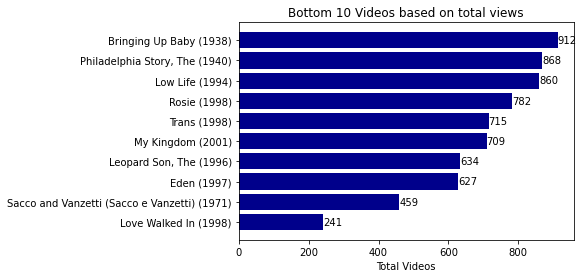

In [60]:
# Visualizing the bottom 10 videos on the basis of view counts

titles = bottom_10_titles_and_views['title']
views = bottom_10_titles_and_views['view_count']

# Create a bar chart
fig, ax = plt.subplots()
bars = ax.barh(titles, views, color='darkblue')

# Add values as labels on the bars
for bar, value in zip(bars, views):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(value), ha='left', va='center')

# Add labels and title
plt.xlabel('Total Videos')

plt.title('Bottom 10 Videos based on total views')

# Show the plot
plt.show()

##### The most liked video

In [11]:
# Find the row with the maximum number of likes
most_liked_video = df[df['like_count'] == df['like_count'].max()]

print("The most liked video is: ", most_liked_video['title'].to_string(index=False, header=False), "with", most_liked_video['like_count'].to_string(index=False, header=False), "likes.")

The most liked video is:  RoboCop 2 (1990) with 97644 likes.


##### The least liked video

In [64]:
# Find the row with the maximum number of likes
least_liked_video = df[df['like_count'] == df['like_count'].min()]

print("The least liked video is: ", least_liked_video['title'].to_string(index=False, header=False), ".")


The least liked video is:  Bread and Chocolate (Pane e cioccolata) (1973)
                         Love Walked In (1998) .


##### The video with the highest duration

In [65]:
# Find the row with the highest duration
highest_duration_video = df[df['time_in_seconds'] == df['time_in_seconds'].max()]

print("The video with highest duration is: ", highest_duration_video['title'].to_string(index=False, header=False), ".")

The video with highest duration is:  Siegfried & Roy: The Magic Box (1999) .


##### Applying sentiment analysis on the downloaded comments for each of the videos using VADER.

In [66]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [67]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [68]:
# Drop rows with no comments or "N/A" comments
df = df[df['comment'].notna() & (df['comment'] != "N/A") & (df['comment'] != "")]

In [69]:
sentiments = [analyzer.polarity_scores(each)['compound'] for each in df['comment']]

In [70]:
sentiments

[0.0,
 0.0,
 0.3182,
 0.0,
 0.7579,
 0.0,
 0.4588,
 0.0,
 0.0,
 0.4201,
 -0.7184,
 0.7964,
 0.6369,
 0.875,
 -0.5859,
 0.0,
 0.6369,
 0.4824,
 0.6369,
 0.6486,
 -0.7005,
 0.9666,
 0.4404,
 0.743,
 0.0,
 -0.296,
 0.0,
 -0.0388,
 0.7506,
 0.4939,
 0.0,
 0.0,
 0.0,
 0.5994,
 0.1536,
 -0.9313,
 -0.34,
 0.7964,
 0.7073,
 0.4019,
 0.7096,
 0.8258,
 0.0,
 0.6892,
 0.9638,
 0.0,
 0.5859,
 0.173,
 0.0,
 0.0,
 0.3818,
 -0.3612,
 0.0,
 -0.5719,
 0.0,
 0.0,
 0.5994,
 0.0,
 0.2944,
 0.0,
 0.4019,
 0.6369,
 0.4588,
 0.6369,
 0.8126,
 0.8126,
 0.9049,
 0.0,
 -0.0516,
 -0.5096,
 0.0,
 0.0,
 -0.765,
 -0.4767,
 0.0,
 0.636,
 0.1531,
 0.0,
 0.6597,
 0.0,
 -0.4404,
 0.0,
 0.6166,
 0.6606,
 0.0,
 0.4404,
 0.4588,
 0.0,
 0.4588,
 0.0,
 -0.2975,
 -0.34,
 -0.7081,
 0.0,
 0.0,
 -0.2023,
 0.7506,
 0.0,
 0.0,
 0.0,
 0.5093,
 0.6833,
 -0.5106,
 0.0,
 0.6879,
 0.4215,
 0.6369,
 0.0,
 0.0,
 -0.5093,
 0.4215,
 0.0,
 0.0,
 0.8507,
 0.0,
 0.802,
 -0.965,
 0.3109,
 0.4588,
 0.0,
 0.0,
 0.0,
 0.032,
 0.34,
 0.0,
 0.5423

In [71]:
# Add a new column named 'sentiment' to the DataFrame
df['sentiment'] = sentiments
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_8880\3387185224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = sentiments


,title,description,view_count,like_count,favorite_count,comment_count,time_in_seconds,comment,sentiment
1,Grumpier Old Men (1995),"The more things change, the more they stay the...",212610,218,0,13,112.0,Buena película de comedia romántica,0.0000
2,Heat (1995),"Director: Michael Mann.\nCast: Al Pacino, Robe...",1390267,7539,0,638,148.0,Pacino and De Niro make this movie together,0.0000
3,GoldenEye (1995),"Release Date: November 13, 1995\n\nPierce Bros...",378404,2175,0,200,172.0,Cool IT men,0.3182
4,"American President, The (1995)",Subscribe to MovieTrailersByVD: http://bit.ly/...,16305,25,0,2,170.0,Why does this have the Little Women (1994) sco...,0.0000
5,Nixon (1995),"One of the best film trailers of all time, thi...",290681,896,0,237,273.0,Anthony Hopkins can play any role; that&#39;s ...,0.7579
...,...,...,...,...,...,...,...,...,...
3707,Once Upon a Time in China III (Wong Fei-hung t...,Original trailer to the 1993 martial arts epic...,74632,58,0,15,179.0,"<a href=""https://www.youtube.com/watch?v=S_Gh2...",0.0000
3708,Memoirs of an Invisible Man (1992),"Like most Chevy Chase movies from the '90s, Me...",75124,130,0,17,116.0,"And finally, I get to see the full trailer of ...",-0.4404
3709,God told Me To (1976),"""Shot guerilla-style all over New York City by...",5562,109,0,5,90.0,The perfect film for Easter ! 😉,0.6114
3710,"Brood, The (1979)",Trailer of the film The Brood without any defe...,55317,87,0,18,63.0,0:39 Am I the only one totally impressed by th...,0.7960


#####  top-10 videos that have the highest positive sentiment

In [72]:
# Sorting the data on the basis of view counts
df_pos_sentiment = df.sort_values(by='sentiment', ascending=False)

In [73]:
# Getting and printing the top 10 videos having highest positive sentiments
top_10_videos = df_pos_sentiment.head(10)

print("Top 10 videos having positive sentiments: ")
top_10_titles_and_sentiments = top_10_videos[['title', 'sentiment']].reset_index(drop=True)
print(top_10_titles_and_sentiments)

Top 10 videos having positive sentiments: 
                                       title  sentiment
0                      One Hour Photo (2002)     0.9972
1                             Traffic (2000)     0.9941
2         Slums of Beverly Hills, The (1998)     0.9914
3  Ms. 45 (a.k.a. Angel of Vengeance) (1981)     0.9909
4                     Passion of Mind (2000)     0.9890
5           Heaven Knows, Mr. Allison (1957)     0.9865
6                   Return with Honor (1998)     0.9861
7  Escape from the Planet of the Apes (1971)     0.9844
8           Watcher in the Woods, The (1980)     0.9834
9                           Trip, The (2002)     0.9829


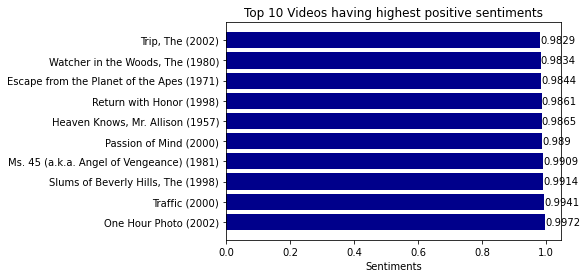

In [75]:
# Visualizing the top 10 videos having highest positive sentiments

titles = top_10_titles_and_sentiments['title']
sentiments = top_10_titles_and_sentiments['sentiment']

# Create a bar chart
fig, ax = plt.subplots()
bars = ax.barh(titles, sentiments, color='darkblue')

# Add values as labels on the bars
for bar, value in zip(bars, sentiments):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(value), ha='left', va='center')


# Add labels and title
plt.xlabel('Sentiments')

plt.title('Top 10 Videos having highest positive sentiments')

# Show the plot
plt.show()

#####  bottom-10 videos that have the highest negative sentiment

In [76]:
# Sorting the data on the basis of view counts
df_pos_sentiment = df.sort_values(by='sentiment', ascending=True)

In [77]:
# Getting and printing the bottom 10 videos having lowest negative sentiments
bottom_10_videos = df_pos_sentiment.head(10)

print("Bottom 10 videos having positive sentiments: ")
bottom_10_titles_and_sentiments = bottom_10_videos[['title', 'sentiment']].reset_index(drop=True)
print(bottom_10_titles_and_sentiments)

Bottom 10 videos having positive sentiments: 
                             title  sentiment
0           Erin Brockovich (2000)    -0.9976
1          Forbidden Planet (1956)    -0.9934
2           Harriet the Spy (1996)    -0.9910
3                    Inside (1996)    -0.9901
4  Church, The (Chiesa, La) (1989)    -0.9887
5             All About Eve (1950)    -0.9842
6          Bonnie and Clyde (1967)    -0.9787
7             Ash Wednesday (2002)    -0.9769
8                    Psycho (1998)    -0.9753
9                    Selena (1997)    -0.9705


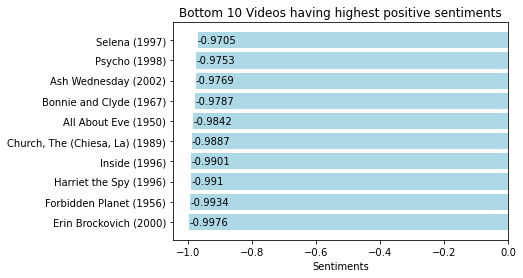

In [79]:
# Visualizing the top 10 videos having lowest negative sentiments

titles = bottom_10_titles_and_sentiments['title']
sentiments = bottom_10_titles_and_sentiments['sentiment']

# Create a bar chart
fig, ax = plt.subplots()
bars = ax.barh(titles, sentiments, color='lightblue')

# Add values as labels on the bars
for bar, value in zip(bars, sentiments):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(value), ha='left', va='center')


# Add labels and title
plt.xlabel('Sentiments')

plt.title('Bottom 10 Videos having highest positive sentiments')

# Show the plot
plt.show()

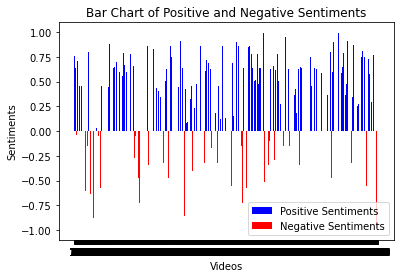

In [90]:
# Visualising the sentiments

# Separate the sentiments into positive and negative lists
positive_sentiments = df[df['sentiment'] >= 0]['sentiment']
negative_sentiments = df[df['sentiment'] < 0]['sentiment']

# Create a bar chart for positive values
plt.bar(positive_sentiments.index, positive_sentiments, color='b', label='Positive Sentiments')

# Create a bar chart for negative values
plt.bar(negative_sentiments.index, negative_sentiments, color='r', label='Negative Sentiments')

# Add labels and title
plt.xlabel('Videos')
plt.ylabel('Sentiments')
plt.title('Bar Chart of Positive and Negative Sentiments')
plt.xticks(df.index)
plt.legend()

# Show the plot
plt.show()

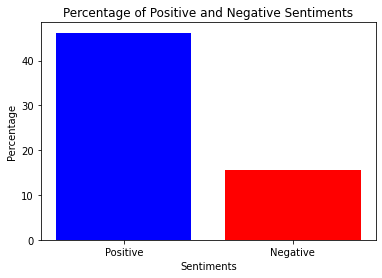

In [92]:
# Calculate the count and percentage of positive and negative values
positive_count = len(df[df['sentiment'] > 0])
negative_count = len(df[df['sentiment'] < 0])
total_count = len(df)
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100

# Create a bar chart to show the percentages
categories = ['Positive', 'Negative']
percentages = [positive_percentage, negative_percentage]

plt.bar(categories, percentages, color=['b', 'r'])

# Add labels and title
plt.xlabel('Sentiments')
plt.ylabel('Percentage')
plt.title('Percentage of Positive and Negative Sentiments')

# Show the plot
plt.show()